**NaufalRasyidS Project Wallmart DataSet**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from xgboost import XGBRegressor

In [ ]:
train_df = pd.read_csv('train.csv')
features_df = pd.read_csv('features.csv')
stores_df = pd.read_csv('stores.csv')
test_df = pd.read_csv('test.csv')


In [ ]:
dataset = train_df.merge(stores_df, how='left').merge(features_df, how='left')
test_dataset = test_df.merge(stores_df, how='left').merge(features_df, how='left')

# **EDA**

In [ ]:
print(dataset)

        Store  Dept        Date  Weekly_Sales  IsHoliday Type    Size  \
0           1     1  2010-02-05      24924.50      False    A  151315   
1           1     1  2010-02-12      46039.49       True    A  151315   
2           1     1  2010-02-19      41595.55      False    A  151315   
3           1     1  2010-02-26      19403.54      False    A  151315   
4           1     1  2010-03-05      21827.90      False    A  151315   
...       ...   ...         ...           ...        ...  ...     ...   
421565     45    98  2012-09-28        508.37      False    B  118221   
421566     45    98  2012-10-05        628.10      False    B  118221   
421567     45    98  2012-10-12       1061.02      False    B  118221   
421568     45    98  2012-10-19        760.01      False    B  118221   
421569     45    98  2012-10-26       1076.80      False    B  118221   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0             42.31       2.572        NaN  

In [ ]:
dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [ ]:
dataset.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667
421569,45,98,2012-10-26,1076.80,False,B,118221,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [ ]:
dataset.nunique()

Store               45
Dept                81
IsHoliday            2
Type                 3
Size                40
MarkDown1         2278
MarkDown2         1499
MarkDown3         1662
MarkDown4         1945
MarkDown5         2294
Year                 3
Month               12
Week                52
Weekly_Sales    359464
dtype: int64

In [ ]:
dataset.describe(include = 'all')

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570,421570.000000,421570,421570,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
unique,NaN,NaN,143,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2011-12-23,NaN,False,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,3027,NaN,391909,215478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,22.200546,44.260317,NaN,15981.258123,NaN,NaN,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,NaN,22711.183519,NaN,NaN,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,NaN,-4988.940000,NaN,NaN,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,NaN,2079.650000,NaN,NaN,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,NaN,7612.030000,NaN,NaN,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,NaN,20205.852500,NaN,NaN,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000


In [ ]:
dataset.isnull()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False
1,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False
2,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False
3,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False
4,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
421566,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
421567,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
421568,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [ ]:
dataset.isnull().mean() * 100

Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Type             0.000000
Size             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
dtype: float64

<ipython-input-10-5fc03e4a3195>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


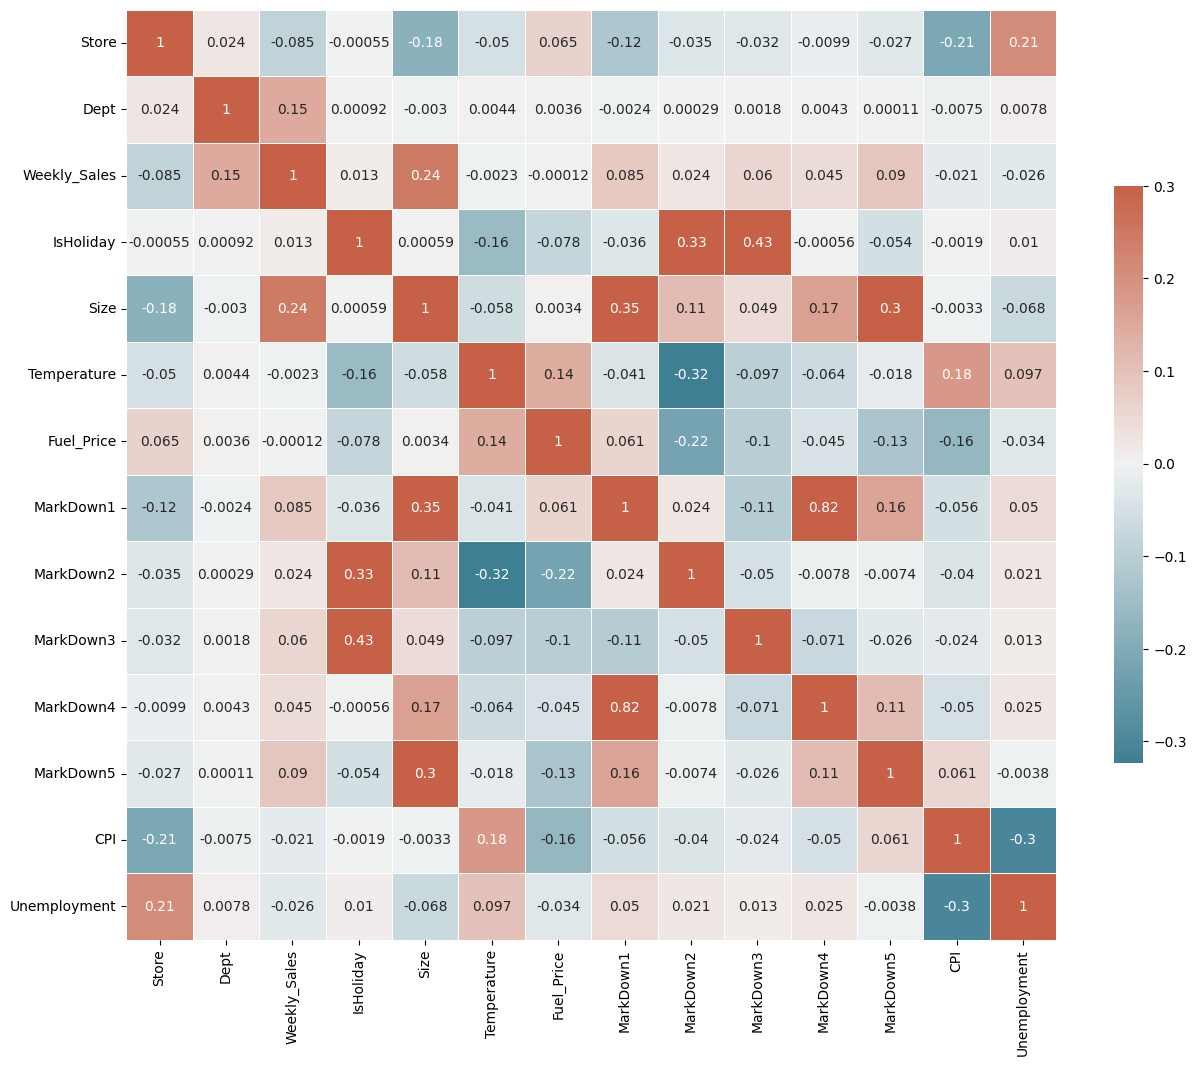

In [ ]:
corr = dataset.corr()
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.show()

# **Modeling**

Time Series Model / Analysis

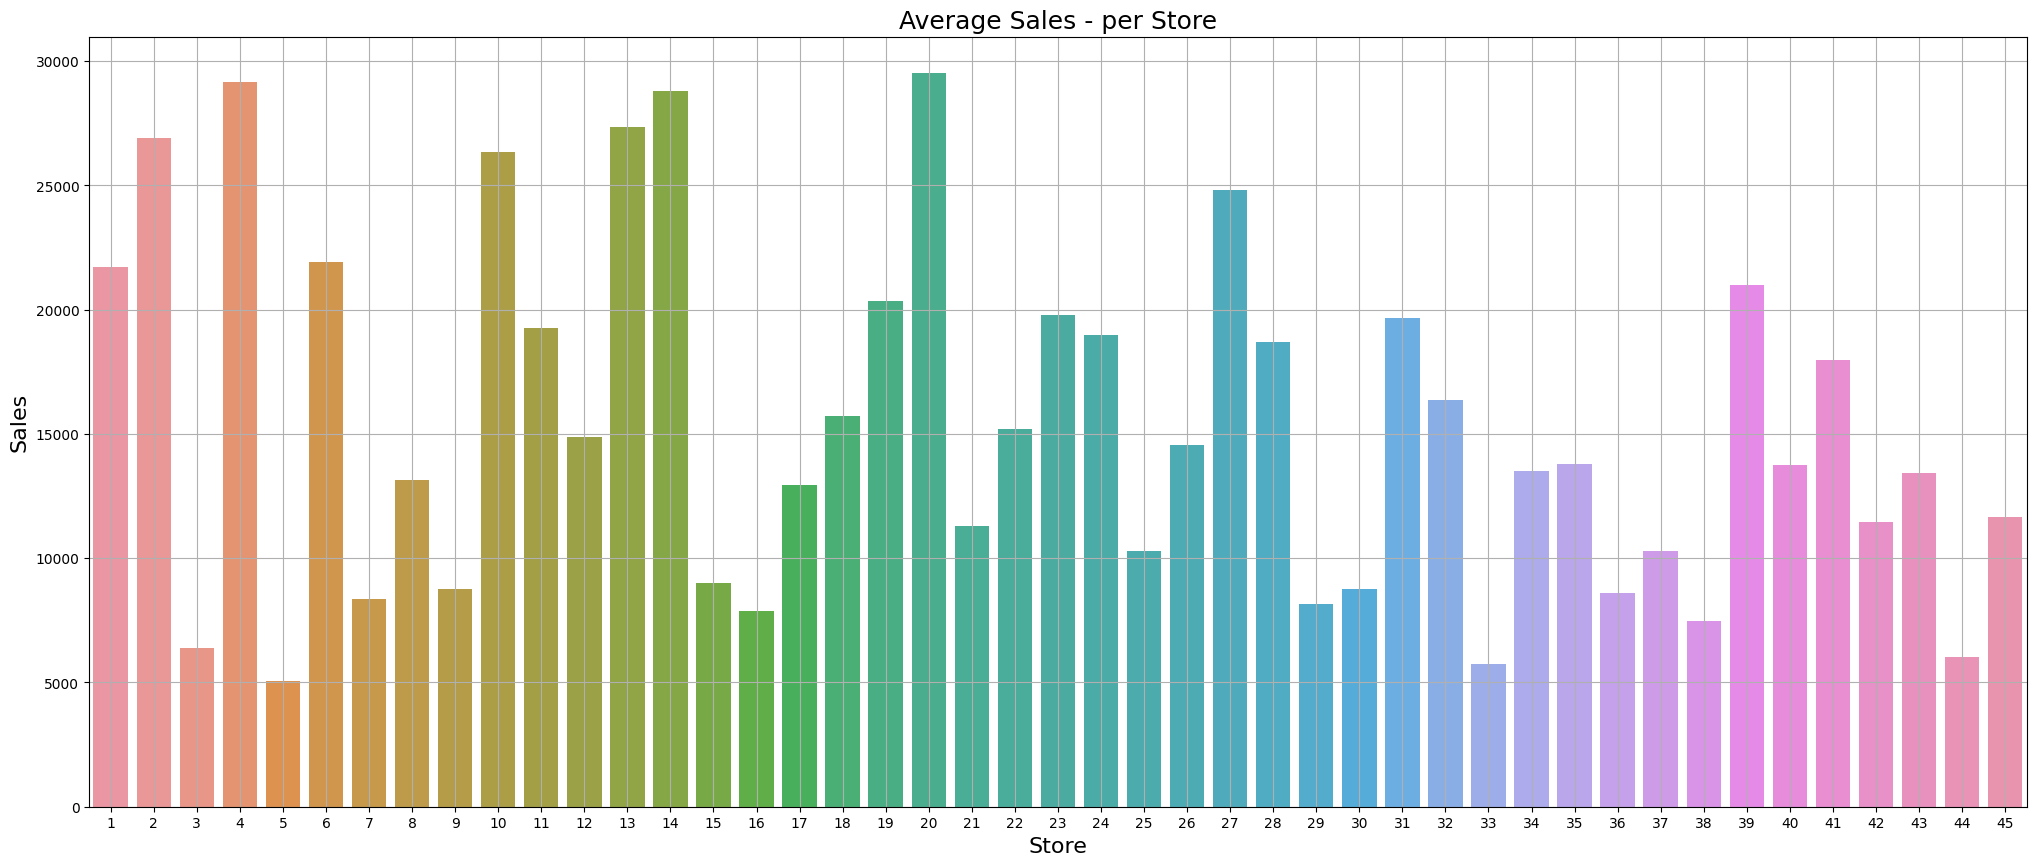

In [ ]:
weekly_sales = dataset.groupby('Store')['Weekly_Sales'].mean().reset_index()
plt.figure(figsize=(25, 10))
plt.style.use('default')
sns.barplot(data=weekly_sales, x='Store', y='Weekly_Sales')
plt.grid()
plt.title('Average Sales - per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

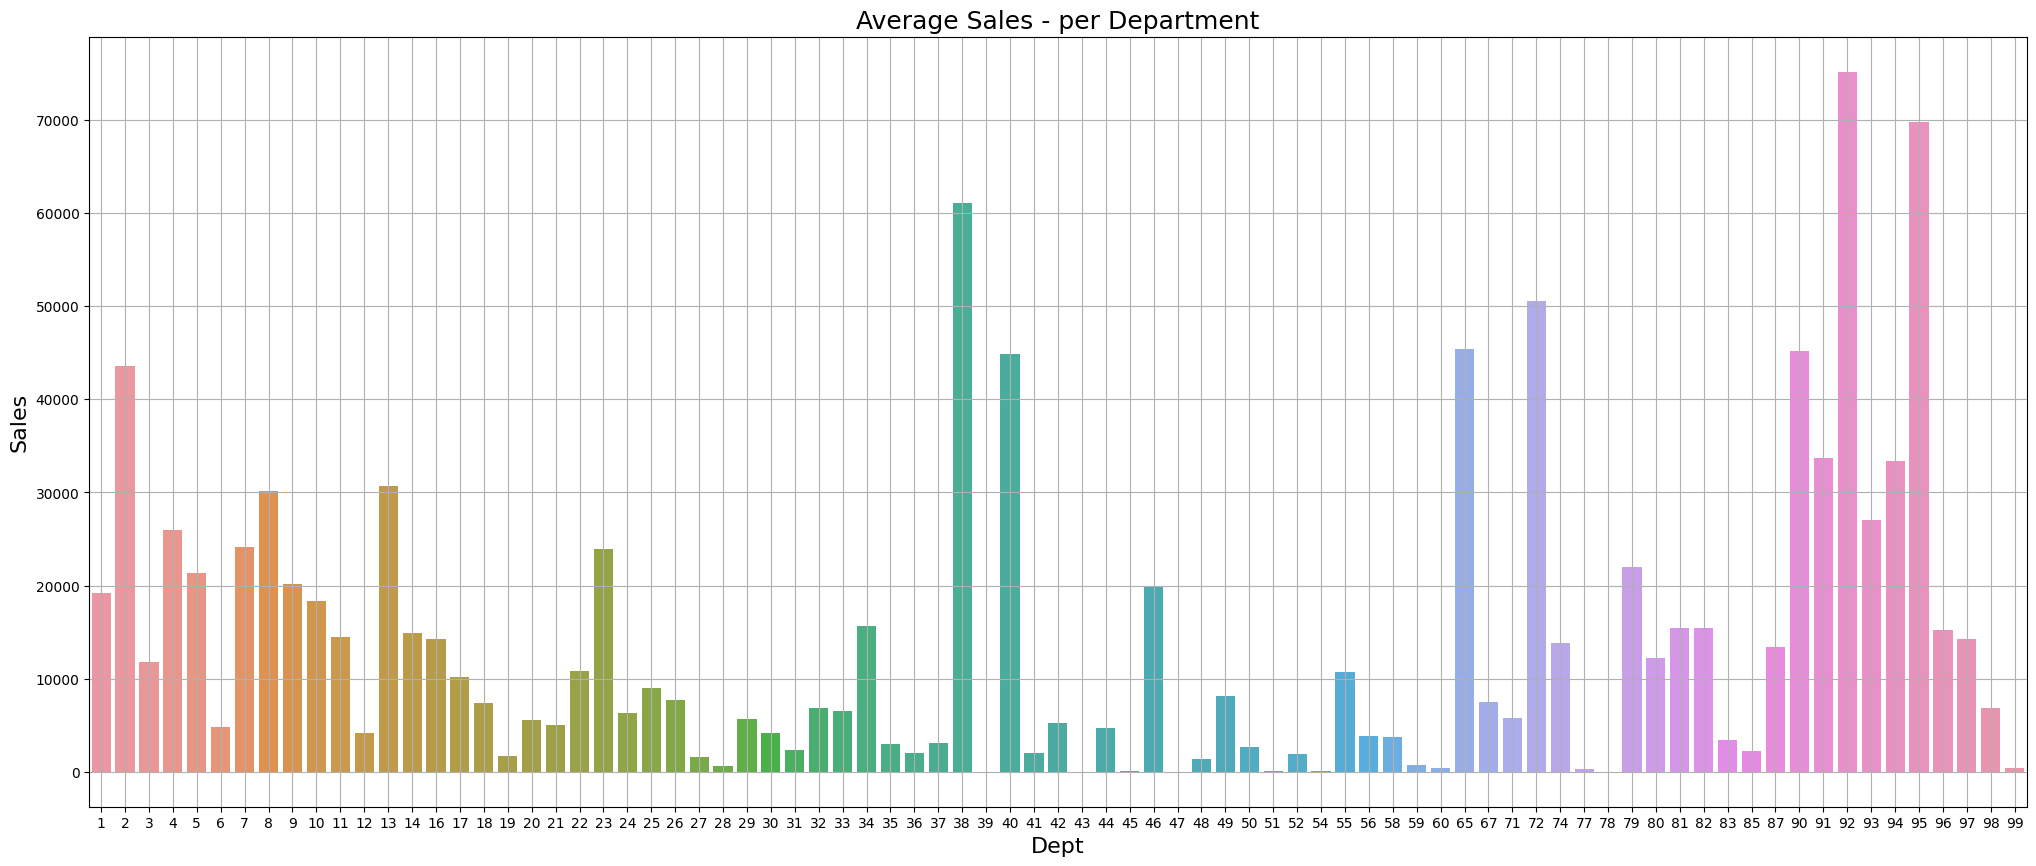

In [ ]:
weekly_sales = dataset.groupby('Dept')['Weekly_Sales'].mean().reset_index()
plt.figure(figsize=(25, 10))
plt.style.use('default')
sns.barplot(data=weekly_sales, x='Dept', y='Weekly_Sales')
plt.grid()
plt.title('Average Sales - per Department', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Dept', fontsize=16)
plt.show()


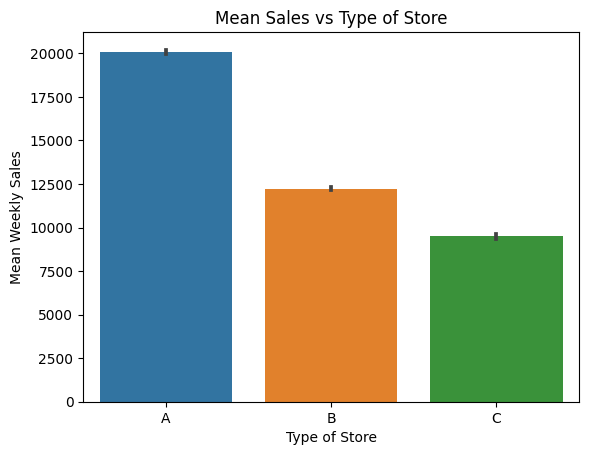

In [ ]:
col = ['red', 'blue', 'green']
sns.barplot(x="Type", y="Weekly_Sales", data=dataset, orient='v')
plt.xlabel('Type of Store')
plt.ylabel('Mean Weekly Sales')
plt.title('Mean Sales vs Type of Store')
plt.show()


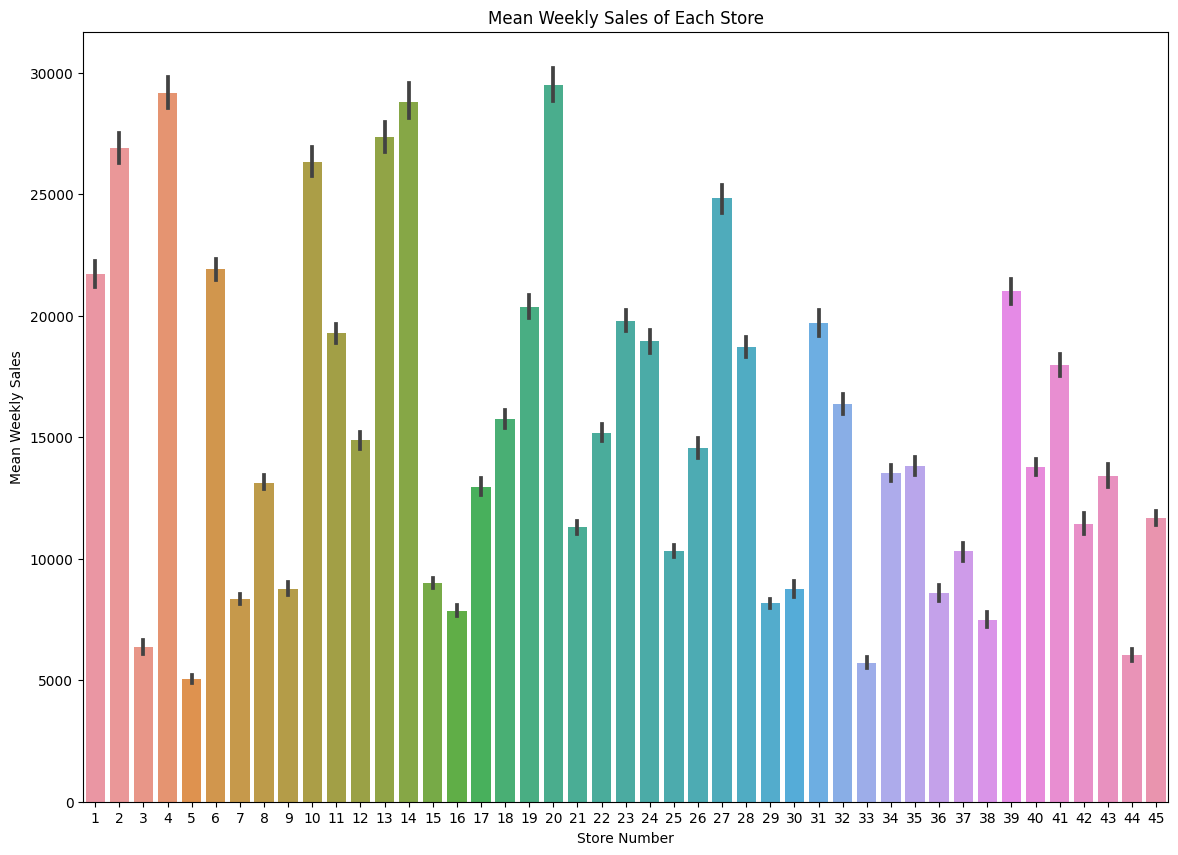

In [ ]:
plt.subplots(figsize=(14, 10))
sns.barplot(x="Store", y="Weekly_Sales", data=dataset, orient='v')
plt.xlabel('Store Number')
plt.ylabel('Mean Weekly Sales')
plt.title('Mean Weekly Sales of Each Store')
plt.show()

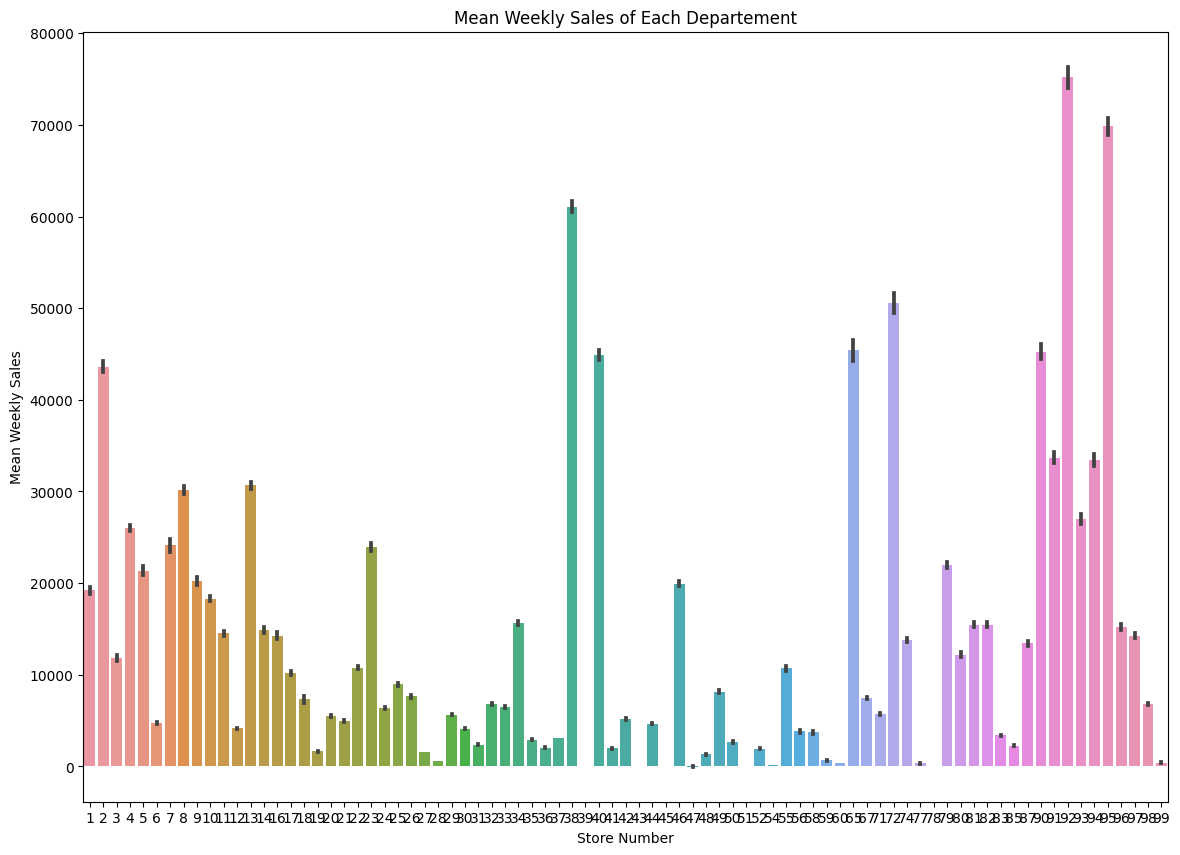

In [ ]:
plt.subplots(figsize=(14, 10))
sns.barplot(x="Dept", y="Weekly_Sales", data=dataset, orient='v')
plt.xlabel('Store Number')
plt.ylabel('Mean Weekly Sales')
plt.title('Mean Weekly Sales of Each Departement')
plt.show()

In [ ]:
store20 = dataset[dataset.Store == 20]
store20 = pd.DataFrame(store20.Weekly_Sales.groupby(store20.index).sum())
store20.dtypes
store20.head(20)

# Remove date from index
store20.reset_index(inplace=True)

# Converting 'date' column to a datetime type
store20['Date'] = pd.to_datetime(store20['Date'])


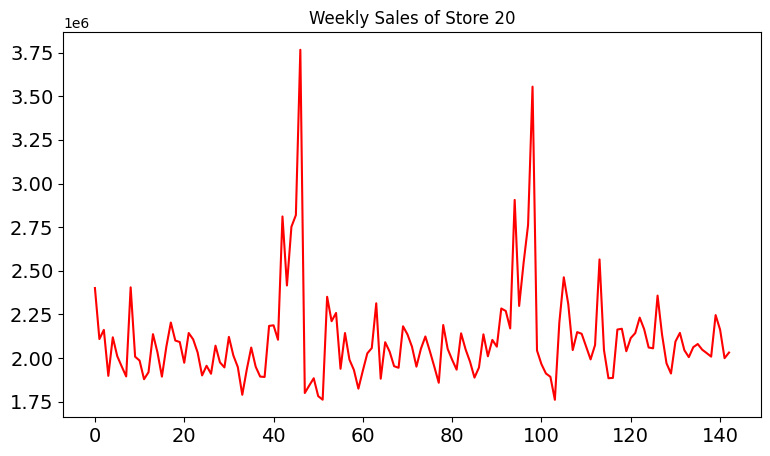

In [ ]:
store20.Weekly_Sales.plot(figsize=(9,5), title= 'Weekly Sales of Store 20', fontsize=14, color = 'red')
plt.show()

In [ ]:
Dept38 = dataset[dataset.Dept == 38]
Dept38 = pd.DataFrame(Dept38.Weekly_Sales.groupby(Dept38.index).sum())
Dept38.dtypes
Dept38.head(20)

# Remove date from index
Dept38.reset_index(inplace=True)

# Converting 'date' column to a datetime type
Dept38['Date'] = pd.to_datetime(Dept38['Date'])

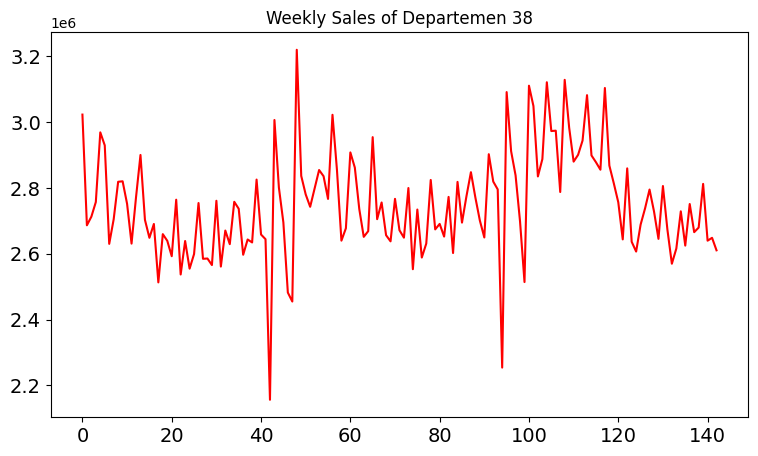

In [ ]:
Dept38.Weekly_Sales.plot(figsize=(9,5), title= 'Weekly Sales of Departemen 38', fontsize=14, color = 'red')
plt.show()

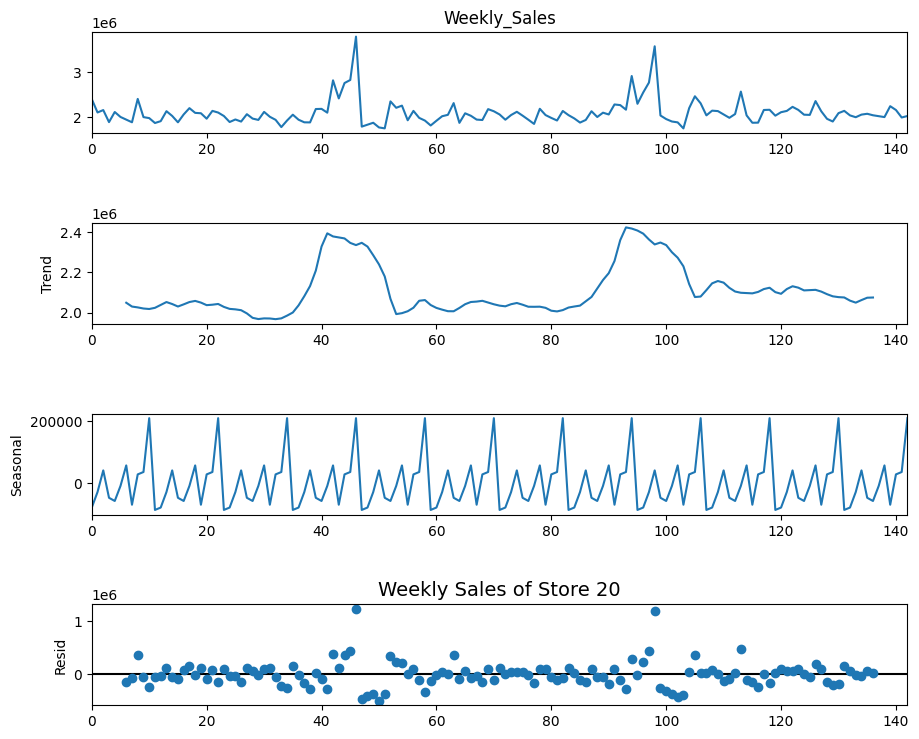

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(store20.Weekly_Sales, period=12)
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.title('Weekly Sales of Store 20', fontsize=14)
plt.show()


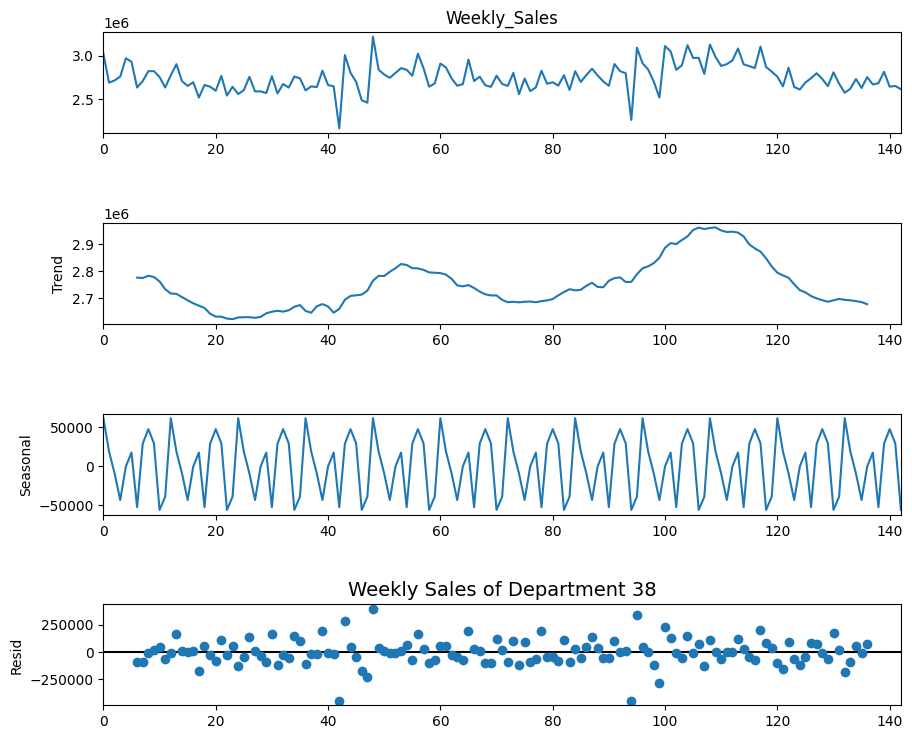

In [ ]:
decomposition = seasonal_decompose(Dept38.Weekly_Sales, period=12)
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.title('Weekly Sales of Department 38', fontsize=14)
plt.show()


<Figure size 640x480 with 0 Axes>

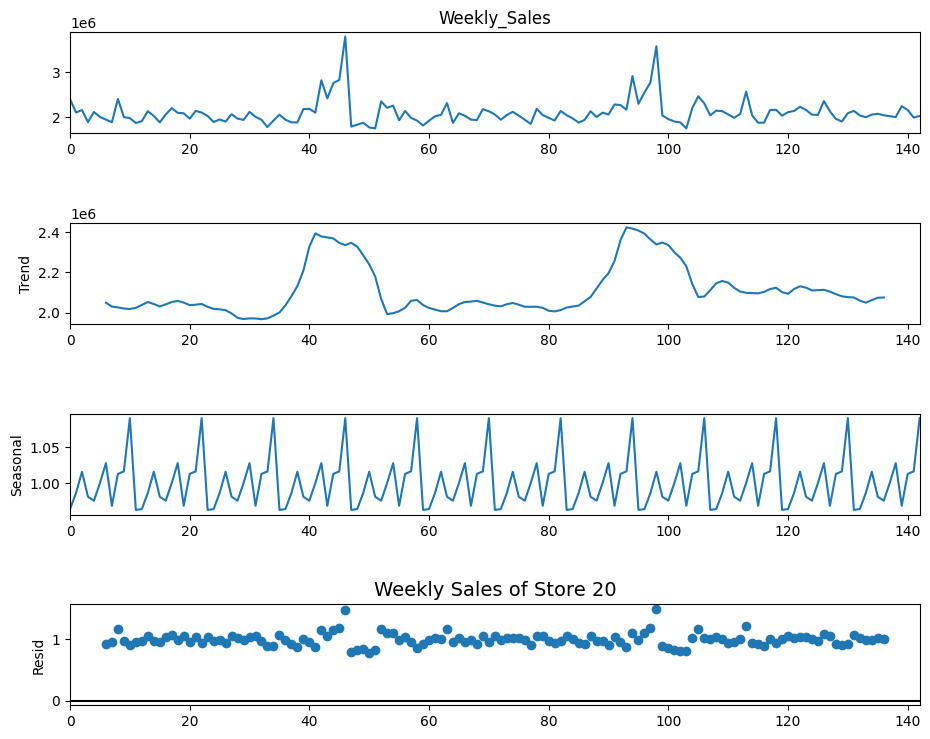

In [ ]:
decomposition = seasonal_decompose(store20.Weekly_Sales, model= 'multiplicative', period=12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.title('Weekly Sales of Store 20', fontsize=14)
plt.show()


<Figure size 640x480 with 0 Axes>

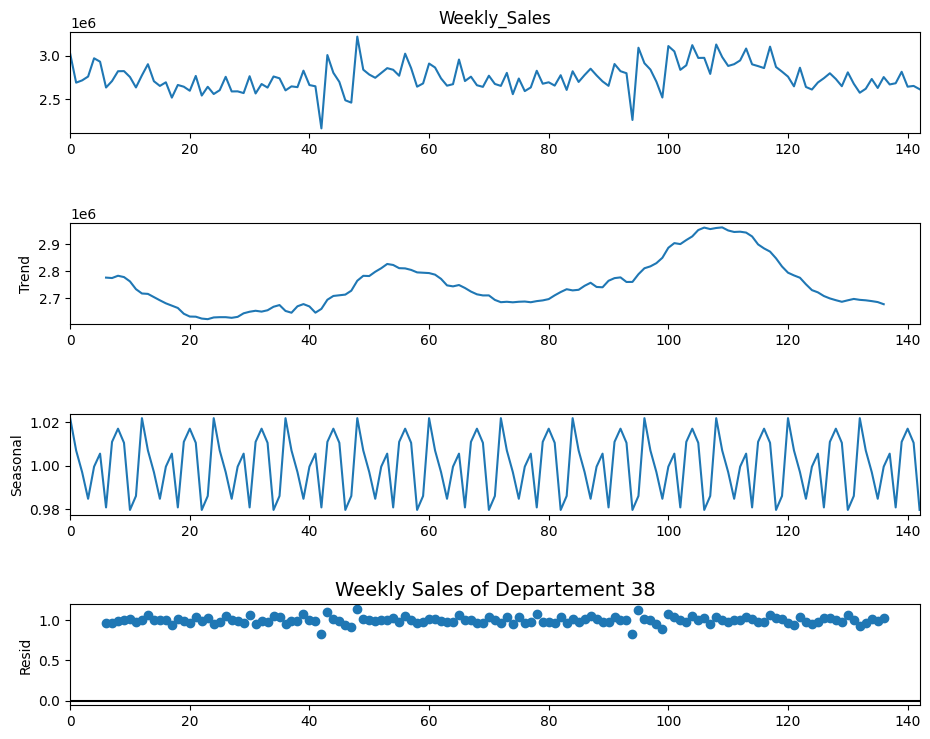

In [ ]:
decomposition = seasonal_decompose(Dept38.Weekly_Sales, model= 'multiplicative', period=12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.title('Weekly Sales of Departement 38', fontsize=14)
plt.show()


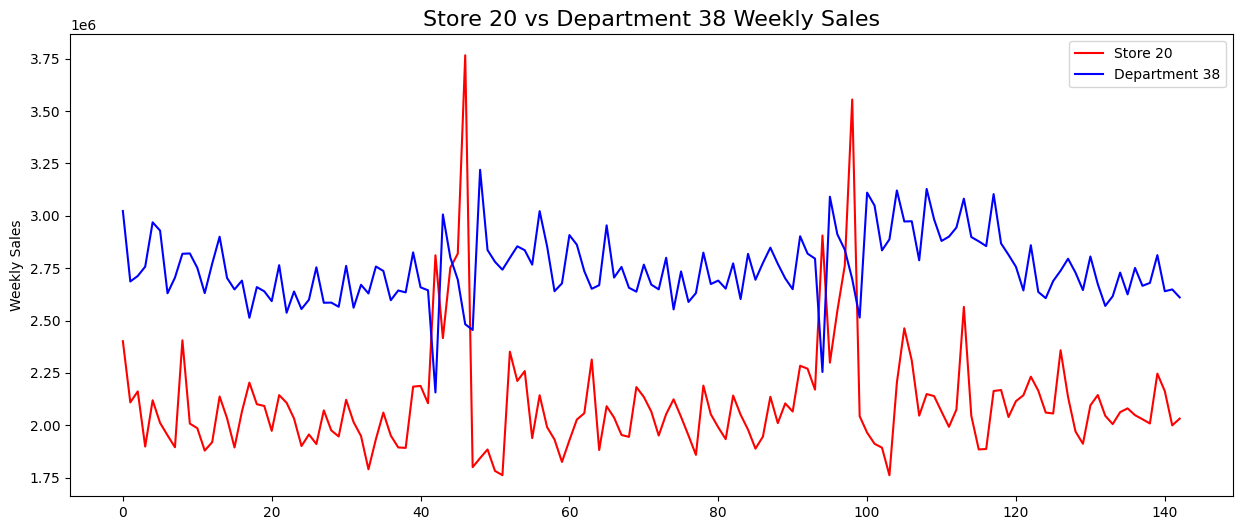

In [ ]:
y1 = store20.Weekly_Sales
y2 = Dept38.Weekly_Sales

y1.plot(figsize=(15, 6), legend=True, color='red', label='Store 20')
y2.plot(figsize=(15, 6), legend=True, color='blue', label='Department 38')

plt.ylabel('Weekly Sales')
plt.title('Store 20 vs Department 38 Weekly Sales', fontsize=16)
plt.show()


Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

# features (X) and label (y)
X = dataset[['Store', 'Dept']]
y = dataset['Weekly_Sales']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# random forest regressor model
rfr = RandomForestRegressor(random_state=42)

# fit the model
rfr.fit(X_train, y_train)
rfr_scores = cross_val_score(rfr, X_train, y_train, cv=10)
print("Cross-Validation Mean Score:", np.mean(rfr_scores))

# predictions on the test data
y_pred = rfr.predict(X_test)

# evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = explained_variance_score(y_test, y_pred)

# Print the evaluation metrics
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)


Cross-Validation Mean Score: 0.9025428262864269
MAE: 2709.0244907752804
MSE: 53217001.45158151
RMSE: 7294.998385988958
R2: 0.8979504783605596


Linear Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split the data
X = dataset[['Store']]  # Use 'Store' as the input feature
y = dataset['Weekly_Sales']  # Use 'Weekly_Sales' as the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Perform predictions
y_pred = model.predict(X_test)

# Print the coefficients and intercept of the linear model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [-150.5551325]
Intercept: 19321.473891229674


In [ ]:
# Evaluate the model
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2:", metrics.explained_variance_score(y_test, y_pred))

MAE: 15143.536166500695
MSE: 517565916.9814905
RMSE: 22750.075098370347
R2: 0.007488807405306996
